In [28]:
#open a website and fetch internal links.
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from urllib.error import HTTPError
import re
from selenium import webdriver
import time



cnt = 0
pages = set()
url_goals_map = {}
tabs_goals_map = {}

open('C:/Users/Swati Gupta/Desktop/Rawtext.txt', "w").close()
open('C:/Users/Swati Gupta/Desktop/Cleantext.txt', "w").close()

fhand= open('C:/Users/Swati Gupta/Desktop/Rawtext.txt', 'a+', encoding = 'UTF-8')
clean_fhand= open('C:/Users/Swati Gupta/Desktop/Cleantext.txt', 'a+', encoding = 'UTF-8')
clean_fhand.write("Average goals for each tab\n\n")

### Define getLinks Class
def getLinks(pageUrl,tab_name):
    global pages
    global cnt

    headers = {}
    headers['User-Agent'] = "Chrome/24.0.1312.27"
     
     ### send request with q=python and headers
    request = Request("https://www.change.org/"+pageUrl, headers = headers)
    
    ### urllib.request.urlopen to crawl the website
    html = urlopen(request)
    bsObj = BeautifulSoup(html)
    getGoals(bsObj, pageUrl, tab_name)
    
    ### regular expression to look for internal links
    for link in bsObj.findAll("a", href=re.compile("^(/petitions)")):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages and cnt<=10:
                cnt+=1
                ### get href attribute value
                newPage = link.attrs['href']
                tab_name= link.text
                pages.add(newPage)
                getLinks(newPage, tab_name)
                
# to find out the average golas of the pages       
def getGoals(bsObj, pageUrl, tab_name):
    driver = webdriver.Chrome()
    driver.get("https://www.change.org"+pageUrl)
    time.sleep(10)
    list=[]
    header_of_links = driver.find_elements_by_class_name('pam')
    
    fhand.write(pageUrl)
    fhand.write('\n')
    
    for header in header_of_links:
        fhand.write(str(header.get_attribute('innerHTML')))
        fhand.write('\n\n')
        
    
    textlinks = driver.find_elements_by_class_name('type-weak')

    for totallink in textlinks:
        new_totallink= str(totallink.text)
        
        number_list=(re.findall(r'\d+', new_totallink))
        number = ''.join(number_list)
        if(len(number)>0):
         list.append(int(number))
    if(len(list) > 0):    
        total_goals= (sum(list))
        if (tab_name == "Browse"):
            tab_name= "Featured"
        

        url_goals_map[pageUrl] = total_goals/len(list)
        tabs_goals_map[tab_name] = total_goals/len(list)
        clean_fhand.write(tab_name + " " + str(total_goals/len(list)))
        clean_fhand.write("\n\n")
    print (url_goals_map)




In [29]:
#To crawl the content of the page like tittle, signin users, text of the page.
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from urllib.error import HTTPError
import urllib.parse
import json
import urllib.request
import re
import requests

def get_content_of_everyLink(path, path_of_all_links):
    headers = {}
    headers['User-Agent'] = "Chrome/24.0.1312.27"
    request = Request("https://www.change.org/p/" + path, headers = headers)
    Url= urlopen(request)
    path_of_all_links[path] = {}
    current_data_dict =  path_of_all_links[path]

    get_elements=BeautifulSoup(Url, 'html.parser')

    #To get the tittle of the 1st link
    current_data_dict['Title'] = get_elements.h1.text
    clean_fhand.write("Title \n " + current_data_dict['Title'].strip())
    clean_fhand.write( '\n\n')
    #print("Tittle is:", current_data_dict['Title'])

# to get the text of 1 link
    current_data_dict['Text_of_page']= get_elements.find("div", {"class": "mbl type-break-word type-l rte"}).text
    clean_fhand.write("Text \n" + current_data_dict['Text_of_page'].strip())
    clean_fhand.write( '\n\n')
    #print(current_data_dict[Text_of_page].text)

    #to get the number of signed in users by API call and from that got displayed_signature_count to get the number of signed in users:

    sign_in_users= requests.get("https://www.change.org/api-proxy/-/petitions/" + path)
    current_data_dict['displayed_signature_count'] = json.loads(sign_in_users.text)['displayed_signature_count']
    clean_fhand.write("Signature Count \n" + str(current_data_dict['displayed_signature_count']))
    clean_fhand.write( '\n\n')

    # TO crawl the total number of goals of each petition.

    totalgoal= requests.get("https://www.change.org/api-proxy/-/petitions/" + path)
    current_data_dict['total_goals'] = json.loads(sign_in_users.text)['calculated_goal']
    clean_fhand.write( '***************************************************************************\n\n')


In [30]:
getLinks("", "")
fhand.close()

{}
{'/petitions': 860000.0}
{'/petitions': 860000.0, '/petitions?selected=popular_weekly': 28500.0}
{'/petitions': 860000.0, '/petitions?selected=popular_weekly': 28500.0, '/petitions?selected=recent': 110.0}
{'/petitions': 860000.0, '/petitions?selected=popular_weekly': 28500.0, '/petitions?selected=recent': 110.0, '/petitions?selected=victories': 426750.0}


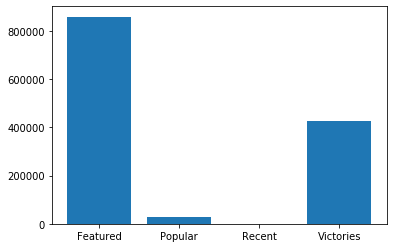

In [31]:
# analysis on the bases of average goals of each tab named as (featured, recent,popular, visitors):

from matplotlib import pyplot as plt
names_of_tab = []
average_goals=[]
for key in tabs_goals_map:
    value_of_tab_goals= tabs_goals_map[key]
    names_of_tab.append(key)
    average_goals.append(value_of_tab_goals)

plt.bar(names_of_tab, average_goals)
plt.show()

In [32]:
#To print out the tab_name with max average goals- tabs( feature/popular/recent/visitor)
max_avg_goals_url = ""
temp=0
for max_avg in url_goals_map:
    if(url_goals_map[max_avg]> temp):
        temp= url_goals_map[max_avg]
        max_avg_goals_url= max_avg
    
print ("Maximum goals is of:", max_avg_goals_url)

    
        
 



Maximum goals is of: /petitions


In [33]:
# to save all the links along with title, text and signed in user of the page:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from urllib.error import HTTPError
import re

headers = {}
path_of_all_links = {}
headers['User-Agent'] = "Chrome/24.0.1312.27"
request = Request("https://www.change.org" + max_avg_goals_url, headers = headers)
Url= urlopen(request)
get_elements=BeautifulSoup(Url, 'html.parser')


for links in get_elements.findAll("a", {"class": "link-block border-rounded hide-overflow bg-brighter mbl"}):
    if 'href' in links.attrs:
        
        address = links.attrs['href'];
        address= address.replace("/p/", "")
        get_content_of_everyLink(address, path_of_all_links)
print ('Content of all links:')        



Content of all links:


In [17]:
print(path_of_all_links)

{'free-nazanin-ratcliffe?source_location=petitions_browse': {'Title': 'Free Nazanin Ratcliffe', 'Text_of_page': 'My wife Nazanin Zaghari-Ratcliffe, 37 year old charity worker, was on holiday visiting her family in Iran. She was at the airport returning to the UK on the 3rd April when she was detained by the Iranian Revolutionary Guard. She has been transferred to an unknown location in Kerman Province, 1,000 kilometres south of Tehran, and is being held in solitary confinement.\nGabriella Ratcliffe our 22 month old daughter (who has British citizenship only) has had her British passport confiscated, and is stranded in Iran with her grandparents.\nNazanin has not been allowed to access a lawyer or her daughter. She has not been able to call out of the country to speak to me, her British husband, and the Red Cross have not been able to make contact.\nThere have been no charges. Nazanin has informed her family that she has been required to sign a confession under duress, its content unkno

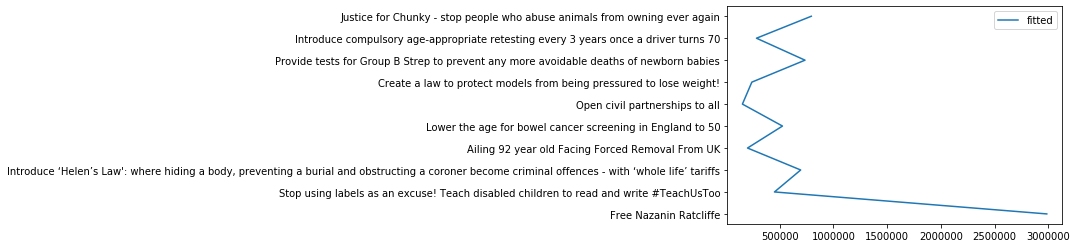

In [34]:
# analysis on the bases of signin users and title for petition:
from matplotlib import pyplot as plt
titles = []
displayed_signature_counts=[]
for key in path_of_all_links:
    value_of_key= path_of_all_links[key]
    titles.append((value_of_key['Title']))
    displayed_signature_counts.append(value_of_key['displayed_signature_count'])

plt.plot(displayed_signature_counts,titles, label="fitted")
plt.legend(loc='best')
plt.show()


    
    
    



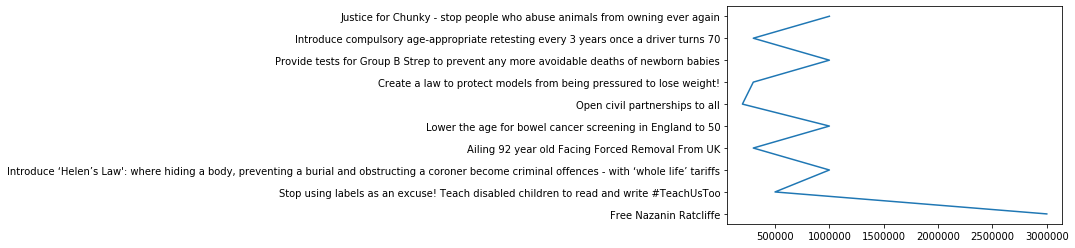

In [35]:
# analysis on the bases of total number of goals and title:

from matplotlib import pyplot as plt
titles = []
Number_of_total_goals=[]
for key in path_of_all_links:
    value_of_key= path_of_all_links[key]
    titles.append((value_of_key['Title']))
    Number_of_total_goals.append(value_of_key['total_goals'])

plt.plot(Number_of_total_goals, titles)
plt.show()

In [36]:
fhand.close()


In [37]:
clean_fhand.close()